In [182]:
pip seaborn

ERROR: unknown command "seaborn" - maybe you meant "search"
Note: you may need to restart the kernel to use updated packages.


In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [437]:
# Import csv file 
eor_contracts = pd.read_csv('seeds/eor_contracts_activated.csv')

# convert date columns to date format
for column in eor_contracts.iloc[:, 3:]:
    eor_contracts[column] = pd.to_datetime(eor_contracts[column])

In [438]:
# Calculate the number of total and delayed contracts
eor_contracts["is_delayed"] = eor_contracts["Original Start Date"] < eor_contracts["Actual Start Date"]
eor_contracts_delayed = eor_contracts[eor_contracts["is_delayed"] == True].value_counts()
eor_contracts_total = eor_contracts.value_counts()
eor_percentage_delayed = (100 * eor_contracts_delayed.sum() / eor_contracts_total.sum())
print(eor_percentage_delayed)

75.16580692704495


In [443]:
eor_contracts.dtypes


Contract id                                                     object
Employment Country Name                                         object
Organization ID                                                  int64
Created At Date                                         datetime64[ns]
Employee Signup At Date                                 datetime64[ns]
Step Verify Your Identity Completed At Date             datetime64[ns]
Employee Provided Additional Info At Date               datetime64[ns]
Employee Provided Bank Details Date                     datetime64[ns]
Employee Provided Compliance Docs Date                  datetime64[ns]
Employee Sign Ea At Date                                datetime64[ns]
Deel Countersign Ea At Date                             datetime64[ns]
Original Start Date                                     datetime64[ns]
Actual Start Date                                       datetime64[ns]
is_delayed                                                        bool
time t

In [440]:
# Calculate days betweeen created date of contract and every step
for column in eor_contracts.iloc[:, 4:13]:
    eor_contracts["time to "+ column] = (((eor_contracts[column] - eor_contracts["Created At Date"]).dt.total_seconds()) / 86400).astype(int)
    

In [441]:
eor_contracts["delay_days"] = eor_contracts["Actual Start Date"] - eor_contracts["Original Start Date"]
eor_contracts["delay_days"].describe()

count                         1357
mean     5 days 07:53:16.757553426
std      7 days 09:55:16.425577757
min                0 days 00:00:00
25%                1 days 00:00:00
50%                3 days 00:00:00
75%                7 days 00:00:00
max               78 days 00:00:00
Name: delay_days, dtype: object

In [444]:
# Groupby delayed and non-delayed and transpose data for better visualization
list_columns_time_delta = ['time to Employee Signup At Date', 'time to Step Verify Your Identity Completed At Date', 'time to Employee Provided Additional Info At Date', 'time to Employee Provided Bank Details Date', 'time to Employee Provided Compliance Docs Date', 'time to Employee Sign Ea At Date', 'time to Deel Countersign Ea At Date']
eor_contracts_grouped_delayed = eor_contracts.groupby(by=['is_delayed'])[list_columns_time_delta].mean()
eor_contracts_grouped_delayed_T = eor_contracts_grouped_delayed.T
display(eor_contracts_grouped_delayed_T)

is_delayed,False,True
time to Employee Signup At Date,4.261128,4.975490
time to Step Verify Your Identity Completed At Date,5.498516,6.201961
time to Employee Provided Additional Info At Date,5.468843,6.686275
time to Employee Provided Bank Details Date,15.744807,16.452941
time to Employee Provided Compliance Docs Date,5.338279,6.494118
time to Employee Sign Ea At Date,13.068249,13.138235
time to Deel Countersign Ea At Date,19.109792,19.883333


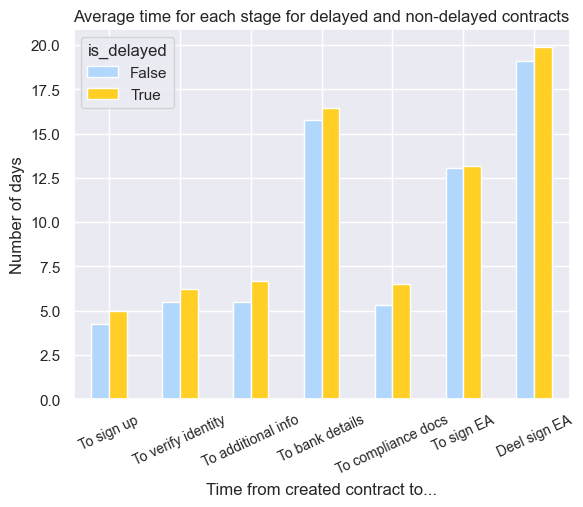

<Figure size 640x480 with 0 Axes>

In [446]:
ax = eor_contracts_grouped_delayed_T.plot.bar(color=["#B1D8FC","#FFCF25"])
xlbls = [ 'To sign up', 'To verify identity', 'To additional info',
          'To bank details', 'To compliance docs', 'To sign EA', 'Deel sign EA']


ax.set_xticklabels( xlbls )
ax.set_ylabel("Number of days")
ax.set_xlabel("Time from created contract to...")
ax.set_title("Average time for each stage for delayed and non-delayed contracts")
ax.tick_params(axis='x', labelsize=10, rotation=25)
plt.show()
plt.savefig('avg_time.png')

In [434]:
# Calculate average number of days for each step of the process
for column in eor_contracts.iloc[:, 13:23]:
    print(column + " " + str(eor_contracts[column].mean()))

is_delayed 0.7516580692704495
time to Employee Signup At Date 4.798084008843036
time to Step Verify Your Identity Completed At Date 6.0272660280029475
time to Employee Provided Additional Info At Date 6.383935151068534
time to Employee Provided Bank Details Date 16.27708179808401
time to Employee Provided Compliance Docs Date 6.2070744288872515
time to Employee Sign Ea At Date 13.120854826823876
time to Deel Countersign Ea At Date 19.69123065585851
time to Original Start Date 14.826086956521738
delay_days 5 days 07:53:16.757553426


In [457]:
# A/B Test KPI's
ab_test_kpi = eor_contracts
ab_test_kpi["kpi1"] = (eor_contracts["Employee Sign Ea At Date"] - eor_contracts["Employee Provided Compliance Docs Date"]).mean()
ab_test_kpi["kpi2"] = (eor_contracts["Actual Start Date"] - eor_contracts["Created At Date"]).mean()

In [458]:
print(ab_test_kpi["kpi1"])
print(ab_test_kpi["kpi2"])


0      6 days 21:55:50.626381724
1      6 days 21:55:50.626381724
2      6 days 21:55:50.626381724
3      6 days 21:55:50.626381724
4      6 days 21:55:50.626381724
                  ...           
1352   6 days 21:55:50.626381724
1353   6 days 21:55:50.626381724
1354   6 days 21:55:50.626381724
1355   6 days 21:55:50.626381724
1356   6 days 21:55:50.626381724
Name: kpi1, Length: 1357, dtype: timedelta64[ns]
0      20 days 03:42:50.670596905
1      20 days 03:42:50.670596905
2      20 days 03:42:50.670596905
3      20 days 03:42:50.670596905
4      20 days 03:42:50.670596905
                  ...            
1352   20 days 03:42:50.670596905
1353   20 days 03:42:50.670596905
1354   20 days 03:42:50.670596905
1355   20 days 03:42:50.670596905
1356   20 days 03:42:50.670596905
Name: kpi2, Length: 1357, dtype: timedelta64[ns]
